<a href="https://colab.research.google.com/github/41123222009/20P03519-MID_SEMESTER/blob/main/UTS_Machine_Learning_4112322009_Iksan_Nur_Afiah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Machine Learning**

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
import warnings

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, auc)

sns.set_style("whitegrid")

## **1. Eksplorasi Data**

### Load Dataset

In [229]:
df = pd.read_csv('https://raw.githubusercontent.com/41123222009/20P03519-MID_SEMESTER/refs/heads/main/Dataset/data_training.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


### Identifikasi Data

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Dataset ini berisi data fitur-fitur kimiawi dari anggur merah
dan putih serta nilai kualitasnya, dengan total 857 entri dan 13 kolom. Berikut adalah deskripsi setiap kolom:

1. `fixed acidity` – Kandungan asam tetap, terutama terdiri dari asam tartarat dan malat.
2. `volatile acidity` – Kandungan asam mudah menguap seperti asam asetat, yang dapat memengaruhi aroma dan rasa.
3. `citric acid` – Asam sitrat, menambah kesegaran dan kompleksitas rasa.
4. `residual sugar` – Jumlah gula yang tersisa setelah proses fermentasi selesai.
5. `chlorides` – Kandungan garam yang memengaruhi rasa dan kestabilan.
6. `free sulfur dioxide` – Jumlah SO₂ bebas yang berperan sebagai agen antimikroba dan antioksidan.
7. `total sulfur dioxide` – Total SO₂ (bebas dan terikat), digunakan sebagai indikator perlindungan oksidatif.
8. `density` – Kepadatan cairan, berkaitan dengan kandungan gula dan alkohol.
9. `pH` – Tingkat keasaman dari sampel.
10. `sulphates` – Kandungan sulfat, berperan dalam pengawetan dan memengaruhi rasa.
11. `alcohol` – Persentase kandungan alkohol (% volume).
12. `quality` – Nilai kualitas minuman berdasarkan penilaian panel (skala ordinal, kemungkinan 0–10).
13. `Id` – 	Nomor identifikasi unik untuk setiap entri data.

### Identifikasi Missing Value

In [231]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Berdasarkan output yang ditampilkan, hasil dari perintah `df.isnull().sum()` menunjukkan bahwa tidak ada nilai yang hilang (missing values) dalam dataset. Ini berarti dataset bersih dan tidak memerlukan penanganan tambahan untuk mengatasi missing values.

### Visualisasi Data

#### A. Histogram Distribusi Kualitas Wine

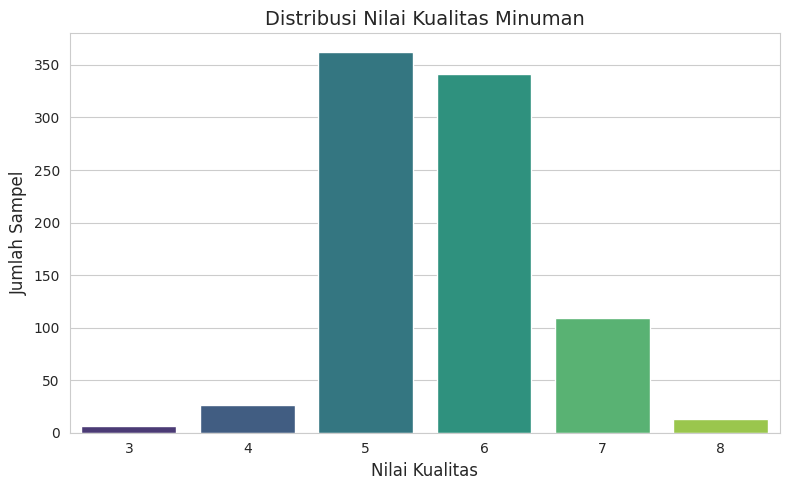

In [232]:
# Buat histogram distribusi kualitas
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality', palette='viridis')

# Tambahkan label dan judul
plt.title('Distribusi Nilai Kualitas Minuman', fontsize=14)
plt.xlabel('Nilai Kualitas', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xticks(rotation=0)

# Tampilkan plot
plt.tight_layout()
plt.show()
warnings.filterwarnings("ignore")

Histogram tersebut menampilkan distribusi nilai kualitas minuman anggur dalam dataset. Dari grafik terlihat bahwa nilai kualitas yang paling sering muncul adalah 5 dan 6, masing-masing dengan lebih dari 300 sampel, menjadikannya sebagai kategori yang paling dominan. Nilai kualitas 7 muncul dalam jumlah yang jauh lebih sedikit, sekitar 100 sampel, sementara nilai 3, 4, dan 8 hanya muncul dalam jumlah yang sangat kecil, masing-masing kurang dari 50 sampel. Distribusi ini menunjukkan bahwa sebagian besar anggur dalam dataset dinilai memiliki kualitas sedang, sedangkan anggur dengan kualitas sangat rendah atau sangat tinggi jarang ditemukan. Hal ini mengindikasikan ketidakseimbangan distribusi, yang perlu dipertimbangkan jika data ini akan digunakan untuk pemodelan klasifikasi.

#### B. Boxplot antar Fitur dan Kualitas

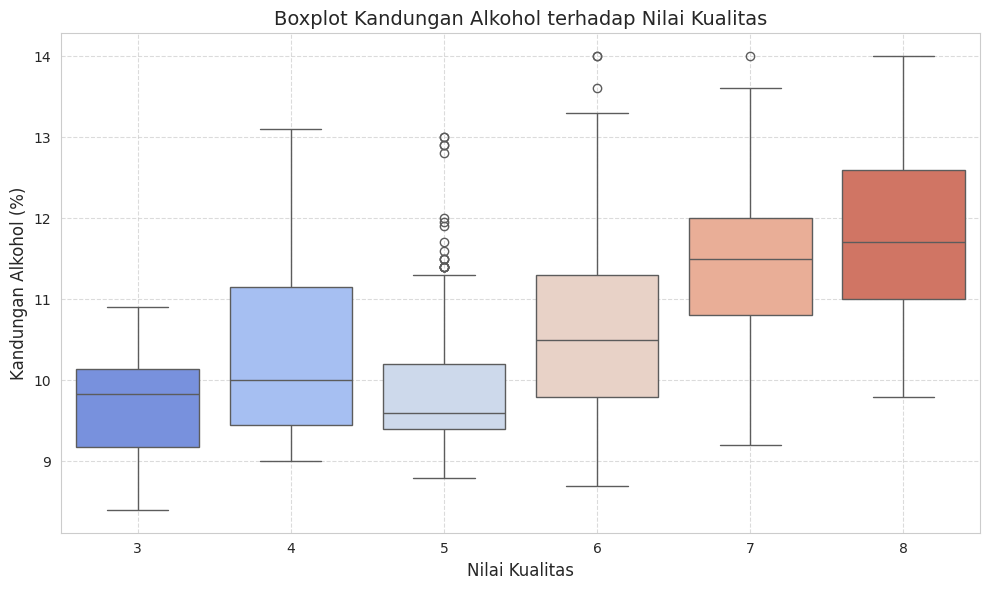

In [233]:
# Buat boxplot untuk melihat distribusi 'alcohol' terhadap nilai 'quality'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quality', y='alcohol', palette='coolwarm')

# Tambahkan label dan judul
plt.title('Boxplot Kandungan Alkohol terhadap Nilai Kualitas', fontsize=14)
plt.xlabel('Nilai Kualitas', fontsize=12)
plt.ylabel('Kandungan Alkohol (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

Boxplot di atas menggambarkan distribusi kandungan alkohol terhadap nilai kualitas minuman anggur. Setiap nilai kualitas (dari 3 hingga 8) memiliki sebaran kandungan alkohol yang ditampilkan melalui rentang interkuartil dan median. Terlihat bahwa terdapat kecenderungan yang cukup jelas: semakin tinggi nilai kualitas, semakin tinggi pula median kandungan alkoholnya. Untuk anggur dengan kualitas 3 hingga 5, kandungan alkohol umumnya berada di bawah 10,5%, dengan median sekitar 9,5% hingga 10%. Sementara itu, pada kualitas 6 hingga 8, median alkohol meningkat dan sebagian besar sampel memiliki kandungan alkohol di atas 11%. Hal ini menunjukkan adanya hubungan positif antara kadar alkohol dan kualitas anggur, yang mengindikasikan bahwa alkohol dapat menjadi salah satu faktor penentu dalam penilaian kualitas minuman dalam dataset ini.

#### C. Heatmap Korelasi antar Fitur

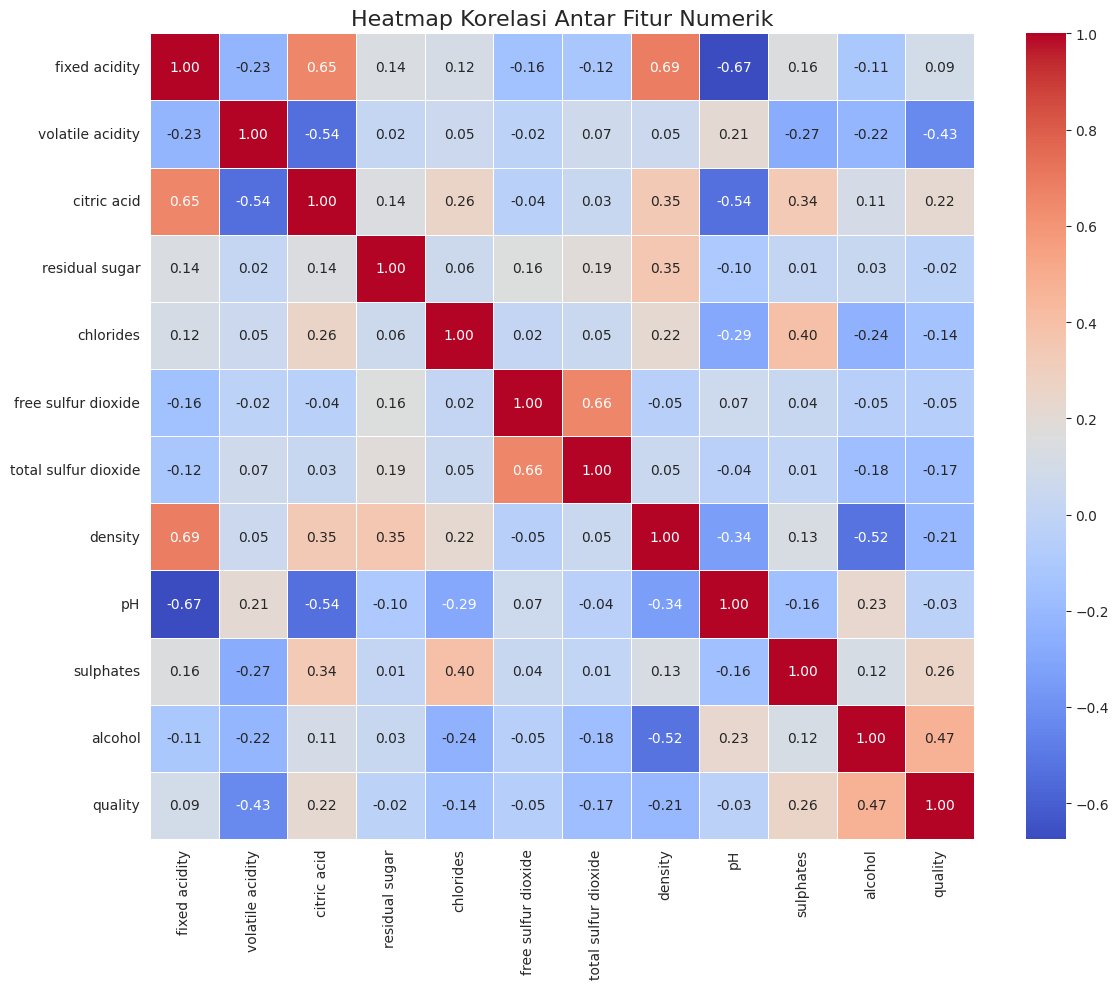

In [234]:
# Hitung matriks korelasi Pearson
correlation_matrix = df.drop(columns=['Id']).corr(method='pearson')

# Buat heatmap dari matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)

# Tampilkan plot
plt.tight_layout()
plt.show()

Heatmap korelasi yang dihasilkan merupakan visualisasi dari hubungan linear antar fitur numerik dalam dataset anggur, kecuali kolom `Id` yang telah dihapus sebelumnya. Setiap sel pada heatmap menunjukkan nilai korelasi Pearson antara dua fitur, dengan warna merah menunjukkan korelasi positif, biru menunjukkan korelasi negatif, dan warna netral menunjukkan korelasi lemah atau mendekati nol. Semakin mendekati angka 1 atau -1, semakin kuat hubungan linear antar fitur tersebut. Beberapa korelasi yang cukup tinggi dapat diamati, seperti antara `free sulfur dioxide` dan `total sulfur dioxide` (0.66) yang menunjukkan keterkaitan logis karena SO₂ total mencakup SO₂ bebas, serta antara `fixed acidity` dan `density` (0.69), yang mengindikasikan bahwa meningkatnya kadar asam tetap juga berdampak pada peningkatan kepadatan cairan.

Dalam konteks hubungan terhadap kualitas anggur (`quality`), fitur `alcohol` memiliki korelasi positif paling tinggi, yaitu sebesar 0.47, yang menunjukkan bahwa kadar alkohol yang lebih tinggi cenderung dikaitkan dengan kualitas anggur yang lebih baik. Sebaliknya, `volatile acidity` memiliki korelasi negatif yang cukup kuat terhadap kualitas (-0.43), menunjukkan bahwa semakin tinggi kandungan asam volatil, semakin rendah kualitas anggur yang dirasakan. Fitur lain seperti `sulphates` dan `citric acid` juga menunjukkan korelasi positif terhadap kualitas, meskipun dalam tingkat yang lebih rendah. Dari visualisasi ini, dapat disimpulkan bahwa fitur-fitur tertentu memiliki pengaruh yang lebih besar terhadap persepsi kualitas anggur, dan informasi ini dapat dimanfaatkan dalam proses seleksi fitur atau pembuatan model prediktif selanjutnya.

#### D. Scatterplot antara Alkohol dan Keasaman

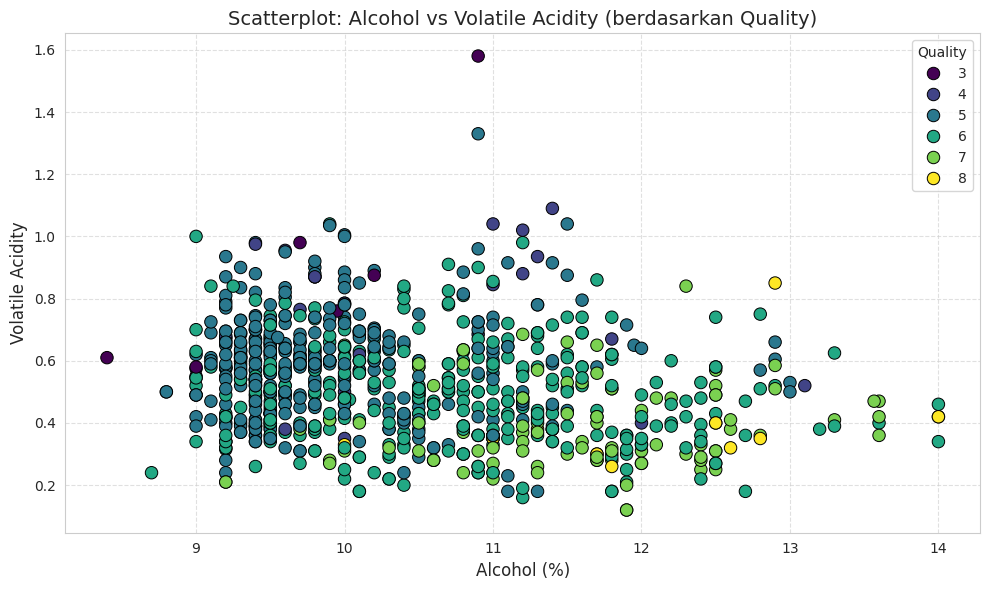

In [235]:
# Buat scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='alcohol',
    y='volatile acidity',
    hue='quality',
    palette='viridis',
    s=80,
    edgecolor='black'
)

# Tambahkan label dan judul
plt.title('Scatterplot: Alcohol vs Volatile Acidity (berdasarkan Quality)', fontsize=14)
plt.xlabel('Alcohol (%)', fontsize=12)
plt.ylabel('Volatile Acidity', fontsize=12)
plt.legend(title='Quality')
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.tight_layout()
plt.show()

Scatterplot tersebut menunjukkan hubungan antara kadar alkohol dan asam volatil dalam sampel anggur, dengan warna titik mewakili nilai kualitas (`quality`). Sumbu horizontal menunjukkan kadar alkohol (%), sedangkan sumbu vertikal menunjukkan kadar asam volatil. Warna titik menggunakan skema `viridis`, di mana warna lebih terang mewakili kualitas yang lebih tinggi.

Dari grafik ini terlihat bahwa anggur dengan kualitas tinggi umumnya memiliki kadar alkohol yang lebih tinggi dan kadar asam volatil yang lebih rendah. Sebaliknya, anggur dengan kualitas rendah cenderung memiliki alkohol rendah dan asam volatil tinggi. Hal ini sejalan dengan hasil korelasi sebelumnya yang menunjukkan alkohol berpengaruh positif terhadap kualitas, sementara asam volatil berpengaruh negatif.

#### E. Bar Plot Rata-Rata Fitur per Kategori Kualitas

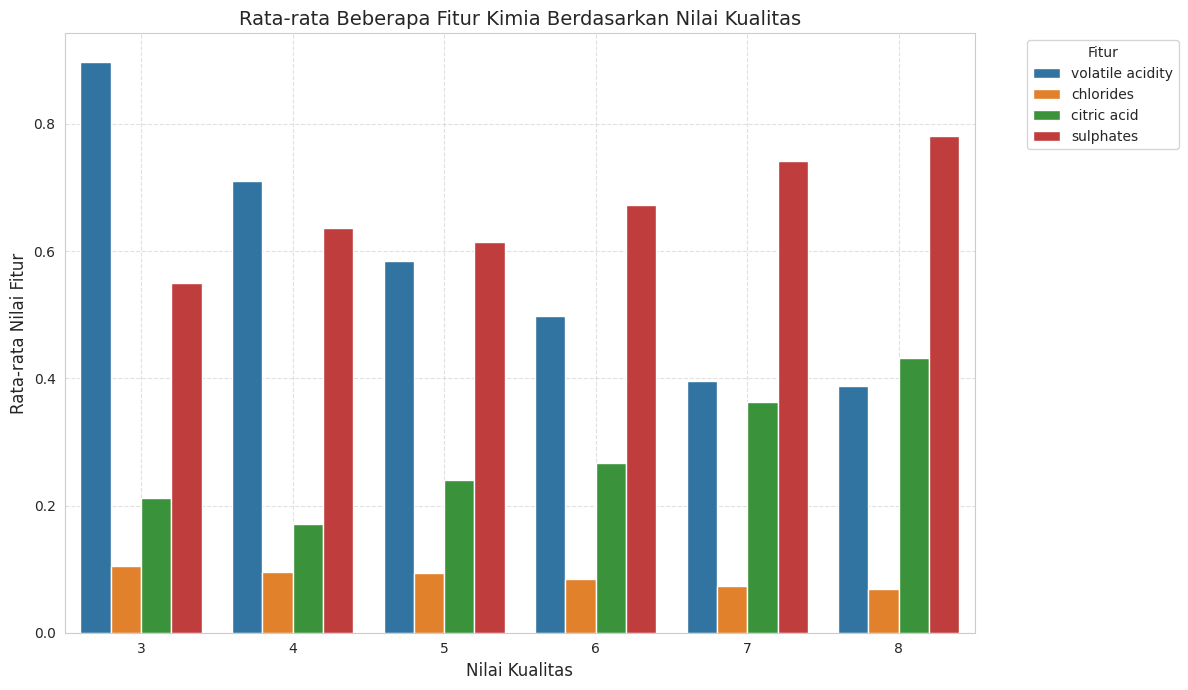

In [236]:
# Pilih fitur yang akan dianalisis
selected_features = [
    'volatile acidity',
    'chlorides',
    'citric acid',
    'sulphates'
]

# Hitung rata-rata per kualitas
mean_features = df.groupby('quality')[selected_features].mean().reset_index()

# Ubah format menjadi long untuk seaborn barplot
mean_features_melted = mean_features.melt(id_vars='quality', var_name='Fitur', value_name='Rata-rata')

# Buat plot
plt.figure(figsize=(12, 7))
sns.barplot(data=mean_features_melted, x='quality', y='Rata-rata', hue='Fitur', palette='tab10')

# Tambahkan label dan judul
plt.title('Rata-rata Beberapa Fitur Kimia Berdasarkan Nilai Kualitas', fontsize=14)
plt.xlabel('Nilai Kualitas', fontsize=12)
plt.ylabel('Rata-rata Nilai Fitur', fontsize=12)
plt.legend(title='Fitur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.tight_layout()
plt.show()

Barplot tersebut menampilkan rata-rata nilai dari beberapa fitur kimia anggur (`volatile acidity`, `chlorides`, `citric acid`, dan `sulphates`) berdasarkan tingkat kualitas anggur (`quality`). Sumbu horizontal menunjukkan nilai kualitas (dari 3 hingga 8), sedangkan sumbu vertikal menunjukkan rata-rata nilai dari masing-masing fitur. Warna batang menunjukkan jenis fitur yang dianalisis.

Dari grafik tersebut, terlihat pola yang konsisten: nilai `volatile acidity` dan `chlorides` cenderung menurun seiring meningkatnya kualitas anggur, sedangkan `citric acid` dan `sulphates` justru meningkat. Hal ini menunjukkan bahwa anggur dengan kualitas tinggi umumnya memiliki kadar asam volatil dan garam yang lebih rendah, serta kandungan asam sitrat dan sulfat yang lebih tinggi. Visualisasi ini memperkuat pemahaman tentang pengaruh masing-masing fitur terhadap persepsi kualitas anggur.

## **2. Preprocessing Data**

### Balancing Data

In [237]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df['quality']

smote = SMOTE(random_state=42, k_neighbors=3)
X_oversample, y_oversample = smote.fit_resample(X, y)

Data diseimbangkan berdasarkan nilai kualitas anggur (`quality`). Pertama, data fitur kimia disimpan dalam variabel `X`, sedangkan label target disimpan dalam `y`. Kemudian digunakan metode SMOTE (*Synthetic Minority Over-sampling Technique*) untuk melakukan oversampling pada kelas minoritas. SMOTE bekerja dengan membuat data sintetis baru berdasarkan sampel minoritas yang ada dan tetangga terdekatnya. Dalam kode ini, digunakan 3 tetangga terdekat (`k_neighbors=3`) untuk membentuk sampel baru secara acak, sehingga distribusi kelas menjadi lebih seimbang dan model dapat belajar dengan lebih baik.

### Feature Scaling Fitur Numerik

In [238]:
scaling = StandardScaler()
X_scaled = scaling.fit_transform(X_oversample)

Dilakukan *scaling* pada fitur numerik menggunakan `StandardScaler`, yang mengubah data agar memiliki rata-rata 0 dan standar deviasi 1. Proses ini penting agar semua fitur berada pada skala yang sama, sehingga model tidak bias terhadap fitur dengan nilai besar. Scaling membantu meningkatkan performa model, terutama untuk algoritma yang sensitif terhadap jarak antar data seperti KNN atau SVM.

### Data Training & Data Testing

In [239]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_oversample,
    test_size=0.2,
    random_state=42,
    stratify=y_oversample
  )

Data dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split`. Parameter `stratify` menjaga distribusi label tetap seimbang, dan `random_state=42` memastikan hasil pembagian konsisten. Train-test split digunakan untuk menguji performa model dengan memisahkan sebagian data sebagai data uji, agar hasil prediksi bisa dievaluasi secara objektif.

## **3. Processing Data**

In [240]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(decision_function_shape='ovr', probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}


evaluation_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil dalam daftar
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

Beberapa model digunakan untuk melatih dan mengevaluasi klasifikasi pada data kualitas anggur. Enam model yang digunakan adalah: Logistic Regression, Decision Tree, Random Forest, SVM, KNN, dan MLP Neural Network. Masing-masing model dilatih menggunakan `X_train` dan `y_train`, lalu dilakukan prediksi terhadap `X_test`. Selanjutnya dihitung metrik evaluasi: akurasi, presisi, recall, dan F1-score dengan rata-rata berbobot (`average='weighted'`) agar memperhitungkan distribusi label yang tidak seimbang. Hasil evaluasi disimpan dalam list `evaluation_results` untuk dibandingkan.

Pemilihan model ini dikarenakan:
- Logistic Regression cocok untuk klasifikasi multikelas dan interpretatif.
- Decision Tree mudah dipahami dan bisa menangani fitur non-linear.
- Random Forest memperbaiki kelemahan decision tree tunggal dan baik untuk data yang kompleks.
- SVM efektif untuk data berdimensi tinggi dan dapat bekerja baik dengan margin klasifikasi yang jelas.
- KNN sederhana namun efektif untuk dataset kecil-menengah.
- MLP Neural Network mampu menangkap hubungan kompleks antar fitur karena memiliki arsitektur non-linear yang fleksibel.

Dengan membandingkan semua model ini, dapat diperoleh model mana yang paling akurat dan sesuai untuk prediksi kualitas anggur dalam dataset ini.

## **4. Evaluasi Model**

### Metric Evaluasi Model

In [241]:
results_df = pd.DataFrame(evaluation_results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.6322     0.6282  0.6322    0.6261
1        Decision Tree    0.7632     0.7641  0.7632    0.7624
2        Random Forest    0.8437     0.8378  0.8437    0.8399
3                  SVM    0.7494     0.7375  0.7494    0.7412
4                  KNN    0.7632     0.7465  0.7632    0.7435
5   MLP Neural Network    0.8414     0.8354  0.8414    0.8374


Output tersebut menunjukkan hasil evaluasi enam model klasifikasi berdasarkan akurasi, presisi, recall, dan F1-score pada data pengujian. Berikut interpretasinya:

- Random Forest memiliki performa terbaik di semua metrik (akurasi: 0.8437, F1-score: 0.8399), menunjukkan kemampuannya menangani kompleksitas dan variasi data dengan baik.
- MLP Neural Network juga menunjukkan performa sangat baik (akurasi: 0.8414), sedikit di bawah Random Forest, menjadikannya alternatif kuat dalam kasus ini.
- Decision Tree dan KNN menghasilkan akurasi serupa (0.7632), tetapi KNN memiliki F1-score yang lebih rendah, mengindikasikan ketidakseimbangan antara presisi dan recall.
- SVM memiliki performa cukup baik (akurasi: 0.7494), tetapi lebih rendah dibanding model-model sebelumnya.
- Logistic Regression menghasilkan skor terendah di semua metrik, menunjukkan model ini kurang cocok untuk dataset ini yang memiliki karakteristik non-linear dan kompleks.

Secara keseluruhan, Random Forest adalah model paling andal untuk klasifikasi kualitas anggur dalam dataset ini, dengan kombinasi metrik yang seimbang dan tinggi.

### Confusion Matrix

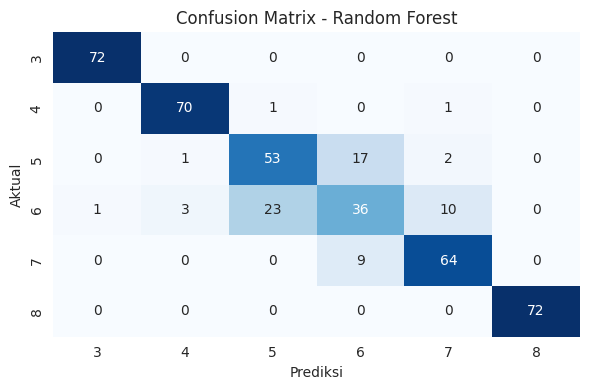

In [242]:
# Inisialisasi dan prediksi ulang dengan Random Forest
best_model = RandomForestClassifier(random_state=42, class_weight='balanced')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

classes = [3, 4, 5, 6, 7, 8]
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

Confusion matrix untuk model terbaik yaitu Random Forest menunjukkan bahwa model mampu mengklasifikasikan kualitas anggur dengan sangat baik, terutama pada kelas 3, 4, dan 8, di mana semua prediksi tepat tanpa kesalahan. Namun, kesalahan klasifikasi terjadi pada kelas tengah seperti 5, 6, dan 7. Misalnya, kelas 5 sering diprediksi sebagai kelas 6, dan sebaliknya, kelas 6 juga salah diprediksi sebagai kelas 5 dan 7. Hal ini menunjukkan bahwa model mengalami kebingungan dalam membedakan kualitas anggur yang berada pada rentang menengah, yang kemungkinan besar disebabkan oleh kemiripan fitur di antara kelas-kelas tersebut. Meskipun demikian, performa secara keseluruhan tetap sangat baik, sejalan dengan skor evaluasi yang tinggi pada metrik akurasi, presisi, recall, dan F1-score.

### Feature Importance

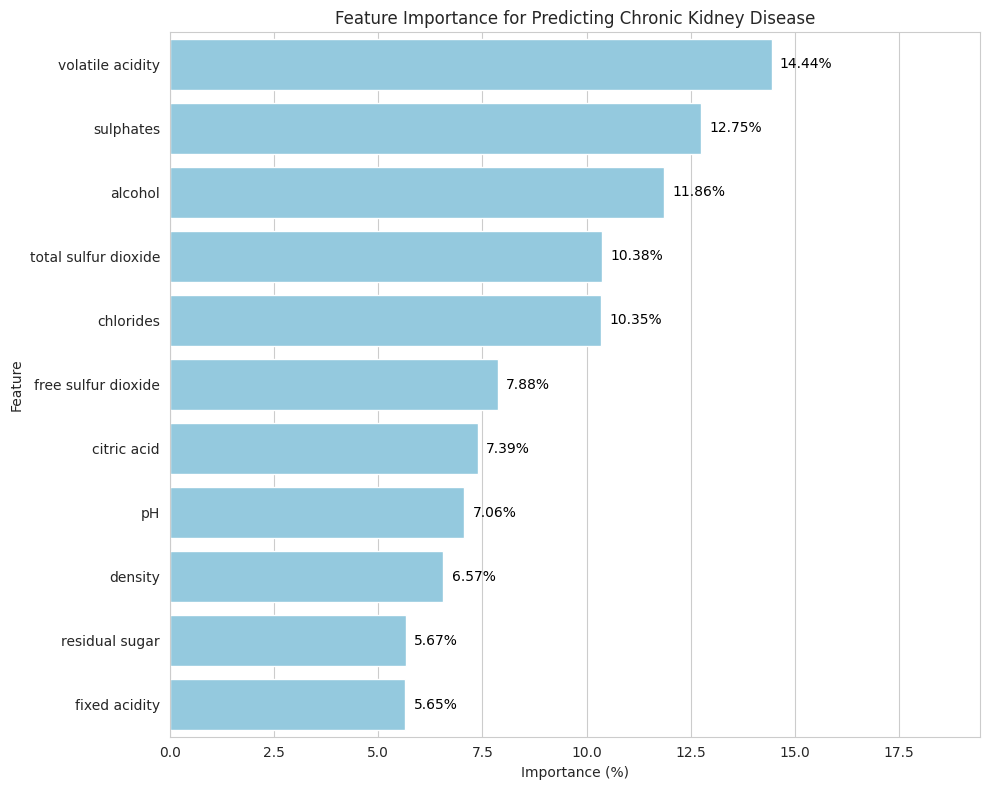

In [243]:
importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

importance_df["Percentage"] = importance_df["Importance"] * 100
importance_df = importance_df.sort_values(by="Percentage", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=importance_df, x="Percentage", y="Feature", color='skyblue')

for i, (value, name) in enumerate(zip(importance_df["Percentage"], importance_df["Feature"])):
    ax.text(value + 0.2, i, f'{value:.2f}%', va='center', ha='left', fontsize=10, color='black')

plt.title("Feature Importance for Predicting Chronic Kidney Disease")
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.xlim(0, importance_df["Percentage"].max() + 5)
plt.tight_layout()
plt.show()

Gambar tersebut menunjukkan grafik feature importance atau tingkat kepentingan masing-masing fitur dalam memprediksi penyakit ginjal kronis. Fitur dengan kontribusi paling besar adalah volatile acidity (14,44%), diikuti oleh sulphates (12,75%) dan alcohol (11,86%). Ini berarti bahwa perubahan dalam kadar keasaman volatil, kadar sulfat, dan kandungan alkohol memiliki pengaruh paling signifikan terhadap hasil prediksi. Sementara itu, fitur seperti fixed acidity dan residual sugar memberikan pengaruh paling kecil, masing-masing hanya sekitar 5,65% dan 5,67%. Interpretasi ini penting untuk membantu dalam proses seleksi fitur atau untuk memahami faktor-faktor dominan yang memengaruhi prediksi model, sehingga bisa digunakan untuk optimasi data atau analisis lebih lanjut dalam konteks medis atau analitik.

## **5. Prediksi Data Testing**

Gunakan model yang telah dibuat untuk memprediksi data dari `data_testing.csv`, kemudian simpan hasil prediksinya ke file CSV.

In [244]:
df_test_new = pd.read_csv('https://raw.githubusercontent.com/41123222009/20P03519-MID_SEMESTER/refs/heads/main/Dataset/data_testing.csv')

ids = df_test_new['Id']
X_test_new = df_test_new.drop(columns=['Id'])
X_test_new_scaled = scaling.fit_transform(X_test_new)
y_pred_new = best_model.predict(X_test_new_scaled)

df_pred_new = pd.DataFrame({
    'Id': ids,
    'Quality': y_pred_new
})

df_pred_new.to_csv('hasilprediksi_009.csv', index=False)

## **6. Kesimpulan**

Berdasarkan hasil eksplorasi, pemrosesan, dan evaluasi model pada dataset, dapat disimpulkan bahwa model Random Forest memberikan performa terbaik dalam memprediksi kualitas wine dibandingkan model lainnya. Hal ini terlihat dari nilai akurasi sebesar 84.37%, serta nilai precision, recall, dan f1-score yang juga tinggi dan seimbang. Selain itu, analisis confusion matrix menunjukkan bahwa model mampu mengklasifikasikan setiap kelas dengan cukup baik, meskipun masih terdapat beberapa kesalahan prediksi pada kelas-kelas yang memiliki distribusi data tidak seimbang.

Dari analisis feature importance, diketahui bahwa fitur seperti volatile acidity, sulphates, dan alcohol memberikan kontribusi paling besar terhadap prediksi kualitas wine. Hal ini menunjukkan bahwa faktor-faktor kimia tertentu sangat berpengaruh dalam menentukan kualitas akhir produk wine.

Secara keseluruhan, proses yang dilakukan mulai dari eksplorasi data, pembersihan data, visualisasi, pemodelan, hingga evaluasi model telah menghasilkan sistem prediksi yang cukup akurat dan dapat diandalkan untuk klasifikasi kualitas wine.